In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import glob

%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 8)
rcParams['legend.fontsize'] = 16
rcParams['axes.labelsize'] = 16
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
plt.style.use('seaborn-dark')

In [51]:
subject = 40861

In [52]:
cr = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Aging Decision Making R01/data/actigraphy/circadian_measures/7_days/cr_7days.csv')
cr[cr['record_id'] == subject][['actmin', 'actamp', 'actalph', 'actbeta', 'actphi']]


,actmin,actamp,actalph,actbeta,actphi
16,0.114951,1.120207,-0.756889,3.531025,12.103077


In [53]:
def read_actig(file): 
    # actigraphy input file is a file with two columns, Time ("%Y-%m-%d %H:%M:%S") and Activity, with no header
    
    data = pd.read_csv(file, sep = ",", header = None, names = ['time', 'activity'])
    data['time'] = data.values[:,0].astype(str)
    data['clocktime'] = [int(dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").time().strftime("%H")) + (int(dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").time().strftime("%M"))/60) for x in data['time']]
    data = data.groupby('clocktime').max()
    data['lmaxact'] = np.log10(data['activity'] + 1)
    return data

In [54]:
act = read_actig("/Users/megmcmahon/Box/CogNeuroLab/Aging Decision Making R01/Data/Actigraphy/processed_2020-06-17/%s.csv" % subject)
x_act = act.index.values
y_act = act.lmaxact


In [55]:
act

,time,activity,lmaxact
clocktime,,,
0.000000,2019-05-03 00:00:30,147.0,2.170262
0.016667,2019-05-03 00:01:30,152.0,2.184691
0.033333,2019-05-03 00:02:30,75.0,1.880814
0.050000,2019-05-03 00:03:30,157.0,2.198657
0.066667,2019-05-03 00:04:30,104.0,2.021189
...,...,...,...
23.916667,2019-05-02 23:55:30,118.0,2.075547
23.933333,2019-05-02 23:56:30,94.0,1.977724
23.950000,2019-05-02 23:57:30,118.0,2.075547


In [56]:
def antilogfx(t, actmin, amp, alpha, beta, phi):
    # takes 5 x: min, amp, alpha, beta, phi
    c = np.cos((t - phi) * (2*np.pi/24))
    return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))

In [57]:
from scipy.optimize import curve_fit
from scipy.optimize import Bounds

In [58]:
cr[cr['record_id'] == subject][['actmin', 'actamp', 'actalph', 'actbeta', 'actphi']].values.tolist()[0]

[0.11495149956431,
 1.1202066228596599,
 -0.756888733320116,
 3.53102546343027,
 12.1030770805243]

In [59]:
y_fit = antilogfx(x_act, 0.0769933554092863,
 1.0,
 -0.921034160375523,
 4.015655046645279,
 15.706432915450598)


bounds = ([-np.inf, 0, -np.inf, 0, 0], [2, 1.9, np.inf, np.inf, 24])
antilog_act, antilog_act_cov = curve_fit(antilogfx, xdata = x_act, ydata = y_act, bounds = bounds)
y_fit_py = antilogfx(x_act, *antilog_act)

([], <a list of 0 Text major ticklabel objects>)

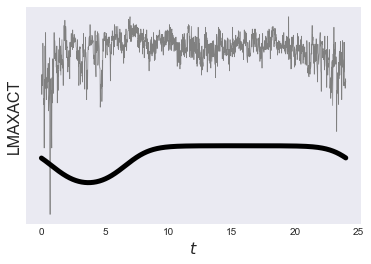

In [60]:
plt.plot(x_act, y_act, color = "gray", linewidth = 0.7)
plt.plot(x_act, y_fit, color = "black", linewidth = 5)
plt.xlabel('$t$')
plt.ylabel('LMAXACT')
plt.yticks([])

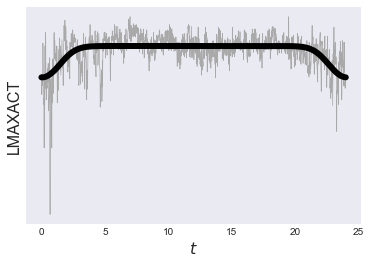

In [61]:
plt.plot(x_act, y_act, label='Actiwatch Raw', color = "darkgray", linewidth = 0.7)
plt.plot(x_act, y_fit_py, label='Cosinor Model', linewidth = 6, color = "black")

plt.xlabel('$t$')
plt.ylabel('LMAXACT')
plt.yticks([])
plt.savefig(fname="/Users/megmcmahon/Desktop/%s.png" % subject, dpi=400)

In [210]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [211]:
antilog_act

array([ 0.74102601,  1.9       , -1.10623008,  9.89787049, 12.04599   ])

In [222]:
cr['record_id'][cr['actamp'] == cr['actamp'].min()]

14    30274
33    40629
44    30412
50    40825
70    40170
79    30581
Name: record_id, dtype: int64